<a href="https://colab.research.google.com/github/mikedoucerain/CapstoneMcgill2019/blob/master/Project1_retail_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['submission.csv', 'train.csv', 'test.csv']


In [0]:
import numpy as np
import pandas as pd
df = pd.read_csv('../input/train.csv', sep=",")
df.head()

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,1,85.0,0,0.0,14,306.500000,0.000000,0.004444,0.0,0.0,Mar,2,2,3,2,Returning_Visitor,False,False
1,2,0,0.0,0,0.0,68,3357.340476,0.018137,0.028272,0.0,1.0,May,3,2,6,2,Returning_Visitor,True,False
2,3,0,0.0,0,0.0,6,56.500000,0.066667,0.116667,0.0,0.0,May,2,6,1,3,Returning_Visitor,True,False
3,4,0,0.0,0,0.0,28,2524.000000,0.008929,0.051786,0.0,0.0,May,2,2,1,3,Returning_Visitor,True,False
4,5,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Nov,2,2,6,2,Returning_Visitor,False,False


In [0]:
df['Weekend'] = (df['Weekend'] == True).astype(int)
#df['Revenue'] = (df['Revenue'] == True).astype(int)

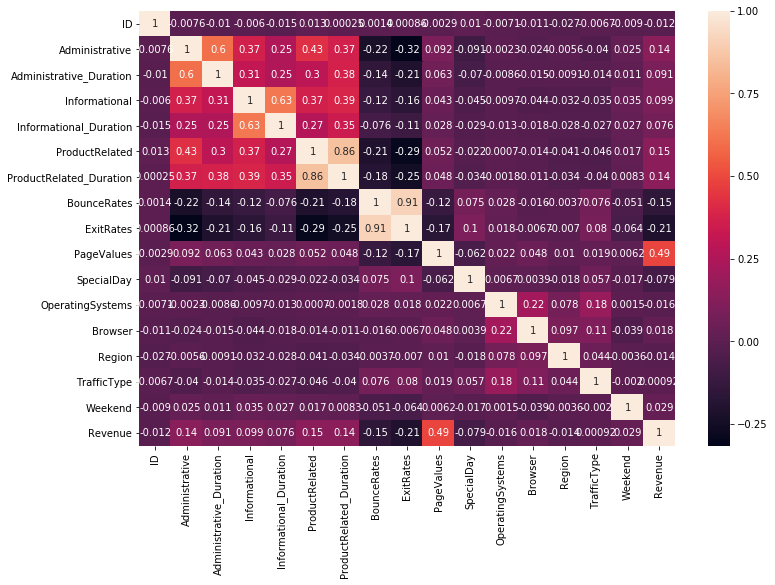

In [0]:
import seaborn as sns
#sns.heatmap(df.corr(), annot=True)

import matplotlib.pyplot as plt

fig = plt.gcf()  # or by other means, like plt.subplots
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2) 
sns.heatmap(df.corr(),annot=True)

In [0]:
categorical = df.select_dtypes(include='object').columns
print(categorical)

Index(['Month', 'VisitorType'], dtype='object')


In [0]:
# Hot encode all categorical columns
for i in categorical:
  new_cols = pd.get_dummies(df[i], prefix=i)
  df = df.drop(i, axis=1)
  df = df.join(new_cols)
  
df.head()

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,1,1,85.0,0,0.0,14,306.500000,0.000000,0.004444,0.0,0.0,2,2,3,2,0,False,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2,0,0.0,0,0.0,68,3357.340476,0.018137,0.028272,0.0,1.0,3,2,6,2,1,False,0,0,0,0,0,0,1,0,0,0,0,0,1
2,3,0,0.0,0,0.0,6,56.500000,0.066667,0.116667,0.0,0.0,2,6,1,3,1,False,0,0,0,0,0,0,1,0,0,0,0,0,1
3,4,0,0.0,0,0.0,28,2524.000000,0.008929,0.051786,0.0,0.0,2,2,1,3,1,False,0,0,0,0,0,0,1,0,0,0,0,0,1
4,5,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,2,6,2,0,False,0,0,0,0,0,0,0,1,0,0,0,0,1


In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA


min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(df.drop(['Revenue','ID','OperatingSystems','Browser','TrafficType'], axis=1))

#pca = PCA(n_components=5)

#Z = pca.fit_transform(X)

y = df['Revenue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


((8488, 25), (8488,), (944, 25), (944,), (1048, 25), (1048,))

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.train import RMSPropOptimizer
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.train import AdamOptimizer
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.regularizers import l1
from keras.regularizers import l2

rmsPropOpt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.001)
nadamOpt = keras.optimizers.Nadam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
dropout_perc = 0.25

nb_features = 25
nb_output = 2

model = Sequential()
model.add(Dense(10,input_shape=(nb_features,), activity_regularizer=l1(0.001), activation='relu'))
model.add(Dense(50, activity_regularizer=l1(0.001),activation='relu'))
model.add(Dropout(dropout_perc))
model.add(Dense(150, activity_regularizer=l1(0.001), activation='relu'))
model.add(Dropout(dropout_perc))
model.add(Dense(200, activity_regularizer=l1(0.001), activation='relu'))
model.add(Dropout(dropout_perc))
model.add(Dense(250, activity_regularizer=l1(0.001), activation='relu'))
model.add(Dropout(dropout_perc))
model.add(Dense(200, activity_regularizer=l1(0.001), activation='relu'))
model.add(Dropout(dropout_perc))
model.add(Dense(150, activity_regularizer=l1(0.001), activation='relu'))
model.add(Dropout(dropout_perc))
model.add(Dense(50, activity_regularizer=l1(0.001), activation='relu'))
model.add(Dropout(dropout_perc))
model.add(Dense(150, activity_regularizer=l1(0.001), activation='relu'))
model.add(Dropout(dropout_perc))
model.add(Dense(200, activity_regularizer=l1(0.001), activation='relu'))
model.add(Dropout(dropout_perc))
model.add(Dense(250, activity_regularizer=l1(0.001), activation='relu'))
model.add(Dropout(dropout_perc))
model.add(Dense(150, activity_regularizer=l1(0.001), activation='relu'))
model.add(Dropout(dropout_perc))
model.add(Dense(50, activity_regularizer=l1(0.001), activation='relu'))
model.add(Dropout(dropout_perc))
model.add(Dense(nb_output,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [0]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'], optimizer=AdamOptimizer(0.0005))
es = EarlyStopping(monitor='val_loss', verbose=1, patience=10)

h = model.fit(X_train,y_train,epochs=100,validation_data=(X_val, y_val),batch_size=10, callbacks=[es])

Train on 8488 samples, validate on 944 samples
Epoch 1/100
8488/8488 [==============================] - 7s 867us/sample - loss: 0.4602 - acc: 0.8434 - val_loss: 0.4242 - val_acc: 0.8422
Epoch 2/100
8488/8488 [==============================] - 6s 676us/sample - loss: 0.4321 - acc: 0.8450 - val_loss: 0.4137 - val_acc: 0.8422
Epoch 3/100
8488/8488 [==============================] - 6s 672us/sample - loss: 0.4193 - acc: 0.8450 - val_loss: 0.4042 - val_acc: 0.8422
Epoch 4/100
8488/8488 [==============================] - 6s 666us/sample - loss: 0.4091 - acc: 0.8450 - val_loss: 0.3919 - val_acc: 0.8422
Epoch 5/100
8488/8488 [==============================] - 6s 666us/sample - loss: 0.3990 - acc: 0.8450 - val_loss: 0.4107 - val_acc: 0.8422
Epoch 6/100
8488/8488 [==============================] - 6s 668us/sample - loss: 0.3806 - acc: 0.8463 - val_loss: 0.3786 - val_acc: 0.8464
Epoch 7/100
8488/8488 [==============================] - 6s 666us/sample - loss: 0.3589 - acc: 0.8559 - val_loss: 0.355

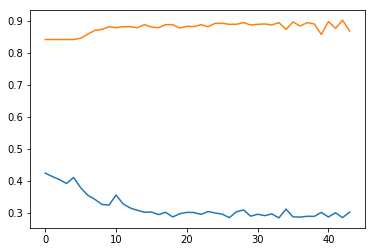

In [0]:
import matplotlib.pyplot as plt
plt.plot(h.history['val_loss'])
plt.plot(h.history['val_acc'])

In [0]:
 score = model.evaluate(X_test, y_test, verbose=1)
print(score[1])

1048/1048 [==============================] - 0s 115us/sample - loss: 0.2983 - acc: 0.8712
0.8711832


In [0]:
from sklearn.metrics import f1_score

y_pred = model.predict_classes(X_test)

print('sklearn Macro-F1-Score:', f1_score(y_test, y_pred, average='macro'))

sklearn Macro-F1-Score: 0.6381798513130941


In [0]:
df_test = pd.read_csv('../input/test.csv', sep=",")
df_test.head()

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,10481,1,13.000000,4,37.5,32,675.666667,0.005714,0.028571,0.000000,0.0,Dec,2,4,1,10,Returning_Visitor,False
1,10482,7,150.375000,0,0.0,7,219.583333,0.000000,0.018182,0.000000,0.0,Dec,1,1,1,2,Returning_Visitor,True
2,10483,0,0.000000,0,0.0,51,742.960317,0.003922,0.012121,0.000000,0.0,Nov,1,1,3,2,Returning_Visitor,True
3,10484,0,0.000000,0,0.0,6,90.166667,0.033333,0.066667,0.000000,0.0,Nov,3,2,4,1,Returning_Visitor,True
4,10485,1,11.888889,0,0.0,111,3510.879903,0.000098,0.009438,12.016565,0.0,Mar,3,2,5,2,Returning_Visitor,False


In [0]:
df_test['Weekend'] = (df_test['Weekend'] == True).astype(int)
categorical = df_test.select_dtypes(include='object').columns

# Hot encode all categorical columns
for i in categorical:
  new_cols = pd.get_dummies(df_test[i], prefix=i)
  df_test = df_test.drop(i, axis=1)
  df_test = df_test.join(new_cols)
  
df_test.head()

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,10481,1,13.000000,4,37.5,32,675.666667,0.005714,0.028571,0.000000,0.0,2,4,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,10482,7,150.375000,0,0.0,7,219.583333,0.000000,0.018182,0.000000,0.0,1,1,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1
2,10483,0,0.000000,0,0.0,51,742.960317,0.003922,0.012121,0.000000,0.0,1,1,3,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,10484,0,0.000000,0,0.0,6,90.166667,0.033333,0.066667,0.000000,0.0,3,2,4,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,10485,1,11.888889,0,0.0,111,3510.879903,0.000098,0.009438,12.016565,0.0,3,2,5,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [0]:
X_prediction = min_max_scaler.fit_transform(df_test.drop(['ID','OperatingSystems','Browser','TrafficType'], axis=1))
#Z_prediction = pca.fit_transform(X_prediction)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
y_prediction = model.predict_classes(X_prediction)

In [0]:
y_prediction = y_prediction.astype(bool)
ids = df_test['ID']

In [0]:


#predictions = pd.DataFrame(y_prediction, columns = ['Revenue'])
#predictions['Revenue'] = (predictions['Revenue'] == True).astype(bool)
#ids = pd.DataFrame(df['ID'], columns = ['ID'])
#ids['ID'] = (ids['ID']).astype(int)
submission = pd.DataFrame({'ID':ids,'Revenue':y_prediction})

submission.head()

,ID,Revenue
0,10481,False
1,10482,False
2,10483,False
3,10484,False
4,10485,False


In [0]:
submission.to_csv('submission_RNN_20190610-2314.csv', index = False)

In [0]:
#kaggle competitions submit -c capstone-summer-2019 -f submission.csv -m "First commission Marjolaine and Michel"

****Trying XGBoost model****

In [0]:
from xgboost import XGBClassifier

xGBoostmodel = XGBClassifier(n_estimators=1000, learning_rate=0.0005,n_jobs=4)
xGBoostmodel.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_val, y_val)],
             verbose=True)

[0]	validation_0-error:0.112288
Will train until validation_0-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.112288
[2]	validation_0-error:0.112288
[3]	validation_0-error:0.112288
[4]	validation_0-error:0.112288
[5]	validation_0-error:0.112288
Stopping. Best iteration:
[0]	validation_0-error:0.112288



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.0005, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
from sklearn.metrics import f1_score

y_pred = xGBoostmodel.predict(X_test)

print('sklearn Macro-F1-Score XGBoost:', f1_score(y_test, y_pred, average='macro'))

sklearn Macro-F1-Score XGBoost: 0.8105497784213067


In [0]:
y_prediction = xGBoostmodel.predict(X_prediction)

In [0]:
submission = pd.DataFrame({'ID':ids,'Revenue':y_prediction})
y_prediction = y_prediction.astype(bool)
ids = df_test['ID']
submission.head()


,ID,Revenue
0,10481,False
1,10482,False
2,10483,False
3,10484,False
4,10485,True


In [0]:
submission.to_csv('submission_XGBoost_20190610-2314.csv', index = False)

****Trying other classifier methods to get better results****

In [0]:
#transform data
def transform_data (df, train):
#vistitor in dumnies
    df = pd.get_dummies(df,columns=['VisitorType'])

    #weekend in 0 1
    df['Weekend'] = np.where(df.Weekend == True, 1, 0)

    #Revenu in 0 1
    if train == True:
        df['Revenue'] = np.where(df.Revenue == True, 1, 0)
    df = df.drop(['Month', "ID"], axis=1)
    return  df

In [0]:
# import dataset

path='../input/'
filename_train = path+'train.csv'
filename_test = path+'test.csv'
df_train = pd.read_csv(filename_train, sep=",")
df_test = pd.read_csv(filename_test, sep=",")

df_train = transform_data(df_train, True)
df_test = transform_data(df_test, False)

In [0]:
#transform df in numpy
train_np = df_train.values
from sklearn.model_selection import train_test_split
train_numpy, test_numpy = train_test_split(train_np, test_size = 0.2, random_state = 1)

In [0]:
X_train = train_numpy[:, :-1]
y_train = train_numpy[:,-1]
X_test = test_numpy[:, :-1]
y_test = test_numpy[:,-1]

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# Linear Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Neural Network
from sklearn.neural_network import MLPClassifier
#SVC
from sklearn.svm import SVC
#GridSearch
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [0]:
def k_fold_validation (model, data_set, model_print, data, X, y, *args, **kwargs):
    k = 5
    kf = KFold(n_splits=k, shuffle=True)
    acc = np.zeros(k)
    i = 0
    for train_i, test_i in kf.split(data_set):
        if model_print == "Random Forest":
            md = RandomForestClassifier(n_estimators=100, max_depth=kwargs['best_depth_param'], \
                                        random_state=1)
        elif model_print == 'Neural Network':
            md = MLPClassifier(hidden_layer_sizes=kwargs['layer_size'], activation=kwargs['activation'])
        elif model_print == 'SVC':
            md = SVC(C=kwargs['best_C'])
        else:
            md = model
        md = md.fit(X[train_i], y[train_i])
        acc[i] = accuracy_score((md.predict(X[test_i])).astype(int), y[test_i])
        i+=1
    print("Accurancy for", model_print, "model, on", data, "data is",np.mean(acc))
    return np.mean(acc), model

In [0]:
def find_best_depth(X_train, y_train, X_test, y_test):
    acc = []
    acc_train = []
    depth = np.arange(1, 50)
    # Calculate accuracy score on the test set for different depths of the trees
    for i in depth:
        # Fit the Regression Tree
        dt = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=1)
        dt.fit(X_train,y_train)
        # Predict on the test set
        y_pred = dt.predict(X_test)
        # Compute the accuracy
        score = accuracy_score(y_test, y_pred)  
        acc.append(score)
        acc_train.append(accuracy_score(y_train, dt.predict(X_train)))
   
    return np.argmax(acc)+1

In [0]:
def gridSearch_C(X, y):

    # Select the optimal C parameter by cross-validation
    tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
    clf = GridSearchCV(SVC, tuned_parameters, cv=10, scoring='accuracy')
    print(clf)
    clf.fit(X, y)
    return clf.best_params_['C']

In [0]:
# Set PCA data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(train_numpy[:, :-1])
Z_train = pca.transform(train_numpy[:, :-1])
Z_test = pca.transform(train_numpy[:, :-1])

# X & y - Data train
X_train_Z = Z_train
y_train_z = train_numpy[:,-1]

# X & y - Data train
X_test_Z = Z_test
y_test_z = test_numpy[:,-1]

In [0]:
# Create dict result for train and test 
rslt_train ={}
rslt_test = {}

# Linear regression
rslt_train['LR'], model_train_log_reg = k_fold_validation(LogisticRegression(), train_numpy, 'logistic regression', 'train', X_train, y_train)
rslt_test['LR'], model_test_log_reg = k_fold_validation(LogisticRegression(), test_numpy, 'logistic regression', 'test', X_test, y_test)

# Linear regression PCA
rslt_train['LR PCA'], model_train_lin_reg = k_fold_validation(LogisticRegression(), train_numpy, 'logistic regression', 'train PCA', X_train_Z, y_train_z)
rslt_test['LR PCA'], model_test_lin_reg  = k_fold_validation(LogisticRegression(), test_numpy, 'logistic regression', 'test PCA', X_test_Z, y_test_z)


# Random Forest Classifier
best_depth = find_best_depth(X_train, y_train, X_test, y_test)
rslt_train['RF'], model_train_rf = k_fold_validation(RandomForestClassifier(), train_numpy, 'Random Forest', 'train', X_train, y_train, best_depth_param = best_depth)
rslt_test['RF'], model_test_rf = k_fold_validation(RandomForestClassifier(), test_numpy, 'Random Forest', 'test', X_test, y_test, best_depth_param = best_depth)

# Random Forest Classifier PCA
best_depth = find_best_depth(X_train, y_train, X_test, y_test)
rslt_train['RF PCA'], model_train_rf_pca = k_fold_validation(RandomForestClassifier(), train_numpy, 'Random Forest', 'train PCA', 
                                                            X_train_Z, y_train_z,best_depth_param = best_depth)
rslt_test['RF PCA'], model_test_rf_pca = k_fold_validation(RandomForestClassifier(), test_numpy, 'Random Forest', 'test PCA', 
                                                            X_train_Z, y_train_z,best_depth_param = best_depth)

# Neural Network
rslt_train['NN'], model_train_nn = k_fold_validation(MLPClassifier(), train_numpy, 'Neural Network', 'train', X_train, y_train, 
                                                                        layer_size =(10,15),  activation ='identity')
rslt_test['NN'], model_test_nn = k_fold_validation(MLPClassifier(), test_numpy, 'Neural Network', 'test', X_test, y_test, 
                                                                        layer_size= (10,15), activation ='identity')
# Neural Network PCA
rslt_train['NN PCA'], model_train_nn_pca = k_fold_validation(MLPClassifier(), train_numpy, 'Neural Network', 'train PCA', X_train_Z, 
                                                            y_train_z, layer_size =(10,15), activation ='identity')
rslt_test['NN PCA'], model_test_nn_pca = k_fold_validation(MLPClassifier(), test_numpy, 'Neural Network', 'test PCA', X_test_Z, 
                                                            y_test_z, layer_size= (10,15), activation ='identity')
#PROBLEME GRIDSEARCH AVEC SVM
''' 
# SVM
best_param = gridSearch_C(X_train, y_train)
rslt_train['SVC'] = [k_fold_validation(SVC(), train_numpy, 'SVC', 'train', X_train, y_train, 
                                                                              best_param_C = best_param)]
rslt_test['SVC'] = [k_fold_validation(SVC(), test_numpy, 'SVC', 'test', X_test, y_test, best_param_C = best_param)]

# SVC PCA
best_param = gridSearch_C(X_train, y_train)
rslt_train['SVC PCA'] = [k_fold_validation(SVC(), ziptrain_data, 'SVC', 'train PCA', X_train_Z, y_train_z, 
                                                                                 best_param_C = best_param)]
rslt_test['SVC PCA'] = [k_fold_validation(SVC(), ziptest_data, 'SVC', 'test PCA', X_test_Z, y_test_z, 
                                                                                 best_param_C = best_param)]
'''
df_rslt_train = pd.DataFrame([rslt_train])
df_rslt_test = pd.DataFrame([rslt_test])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accurancy for logistic regression model, on train data is 0.9989266547406082
Accurancy for logistic regression model, on test data is 0.9957097397431527


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accurancy for logistic regression model, on train PCA data is 0.8541252349988543
Accurancy for logistic regression model, on test PCA data is 0.8626002954881237


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accurancy for Random Forest model, on train data is 1.0
Accurancy for Random Forest model, on test data is 0.9980906921241051
Accurancy for Random Forest model, on train PCA data is 0.853411877386457
Accurancy for Random Forest model, on test PCA data is 0.8578167973633368
Accurancy for Neural Network model, on train data is 0.9700655933214073
Accurancy for Neural Network model, on test data is 0.893617456529151
Accurancy for Neural Network model, on train PCA data is 0.8532925456442134
Accurancy for Neural Network model, on test PCA data is 0.8444482327537222


Plot accuracy result

In [0]:
df_rslt_train =df_rslt_train.sort_values(by=0, ascending=True, axis=1)
df_rslt_test =df_rslt_test.sort_values(by=0, ascending=True, axis=1)

Train data

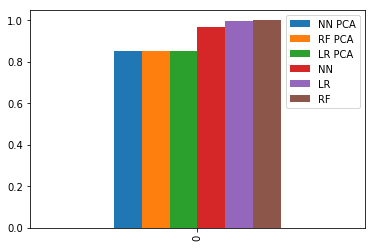

In [0]:
df_rslt_train.plot.bar();

In [0]:
df_rslt_test

,NN PCA,RF PCA,LR PCA,NN,LR,RF
0,0.844448,0.857817,0.8626,0.893617,0.99571,0.998091


Best performance is Random Forest

In [0]:
model_train_rf.fit(X_train,y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
y_prediction = model_train_rf.predict(df_test)
y_prediction = y_prediction.astype(bool)

In [0]:
submission = pd.DataFrame({'ID':ids,'Revenue':y_prediction})

submission.head()



,ID,Revenue
0,10481,False
1,10482,False
2,10483,False
3,10484,False
4,10485,False


In [0]:
submission.to_csv('submission_RF_20190609-1150.csv', index = False)